# Case 2 - Yearly Customer Revenue Data

For this case study, we are investigated the yearly revenue of various customers of an example company. Below, we have a table summarizing the yearly revenue and customers of the company.

In [8]:
from case2_data import *

data = Case2Data()
data.print_table()

+---------------------------------+----------------+----------------+----------------+
|               Year              |      2015      |      2016      |      2017      |
+---------------------------------+----------------+----------------+----------------+
|          Total Revenue          | $29,036,749.19 | $25,730,943.59 | $31,417,495.03 |
|       New Customer Revenue      | $29,036,749.19 | $18,245,491.01 | $28,776,235.04 |
|     Existing Customer Growth    |       -        |   $20,335.46   |   $20,611.34   |
|        Revenue Attrition        |       -        | $3,305,805.60  | -$5,686,551.44 |
|    Existing Customer Revenue    |       -        | $7,485,452.58  | $2,641,259.99  |
| Prior Existing Customer Revenue |       -        | $7,465,117.12  | $2,620,648.65  |
|         Total Customers         |    231,294     |    204,646     |    249,987     |
|    Prior Year Total Customers   |       -        |    231,294     |    204,646     |
|          New Customers          |    231,

To visualize the complexities of the data, we created a few charts below.

The first chart shows the total revenue and customers of the three years, split between existing customers and new customers.

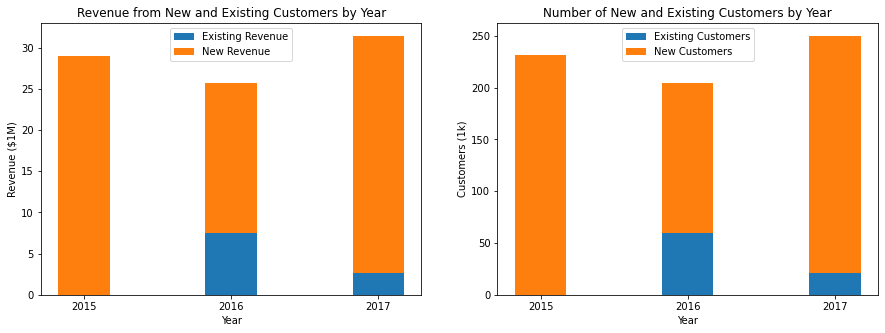

In [9]:
import matplotlib.pyplot as plt

labels = ['2015', '2016', '2017']
rev_ex = [data.years[int(x)].ex_cust_rev_curr / 100 / 1000000 for x in labels]
rev_new = [data.years[int(x)].new_cust_rev / 100 / 1000000 for x in labels]
cust_new = [data.years[int(x)].new_cust / 1000 for x in labels]
cust_ex = [(data.years[int(x)].tot_cust - data.years[int(x)].new_cust) / 1000 for x in labels]

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.bar(labels, rev_ex, width, label='Existing Revenue')
ax1.bar(labels, rev_new, width, bottom=rev_ex, label='New Revenue')

ax1.set_ylabel('Revenue ($1M)')
ax1.set_xlabel('Year')
ax1.set_title('Revenue from New and Existing Customers by Year')
ax1.legend()

ax2.bar(labels, cust_ex, width, label='Existing Customers')
ax2.bar(labels, cust_new, width, bottom=cust_ex, label='New Customers')

ax2.set_ylabel('Customers (1k)')
ax2.set_xlabel('Year')
ax2.set_title('Number of New and Existing Customers by Year')
ax2.legend()

plt.show()

From the chart, we can see that most of the revenue comes from new customers, which are the majority of the customers for the company. 2016 was the year with the largest retention rate, but was also the year with the least revenue.

The next chart is a histogram of the revenue distribution for all the customers across all three years. 

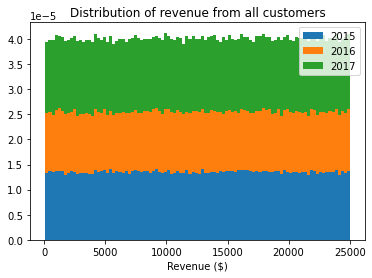

In [10]:
n_bins = 100
fig, ax = plt.subplots()
labels = [2015, 2016, 2017]

hist_data = [[],[],[]]

for c in data.customers.values():
    for i in range(3):
        if labels[i] in c.years:
            hist_data[i].append(c.years[labels[i]])

ax.hist(hist_data, n_bins, density=True, label=labels, stacked=True)
ax.legend(prop={'size': 10})
ax.set_xlabel("Revenue ($)")
ax.set_title('Distribution of revenue from all customers')

plt.show()

From the histogram, the customers across all three years are evenly distributed in revenue between $0 to $25000. The average revenue per customer remains constant, and the only difference in revenue for the company across the three years is the number of customers for the company.

The next graph compares the average revenue for existing vs new customers for each year. The graph shows that there are no differences in the average revenue between new and existing customers or any differences in average revenue across the years.

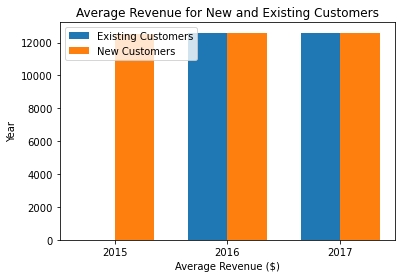

In [11]:
import numpy as np

labels = ['2015', '2016', '2017']

ex_avg = [data.years[int(x)].ex_cust_rev_curr / max((data.years[int(x)].tot_cust - data.years[int(x)].new_cust), 1) for x in labels]
new_avg = [data.years[int(x)].new_cust_rev / max(data.years[int(x)].new_cust, 1) for x in labels]

index = np.arange(3)
bar_width = 0.35

fig, ax = plt.subplots()
ex_data = ax.bar(index, ex_avg, bar_width,
                label="Existing Customers")

new_data = ax.bar(index+bar_width, new_avg,
                 bar_width, label="New Customers")

ax.set_xlabel('Average Revenue ($)')
ax.set_ylabel('Year')
ax.set_title('Average Revenue for New and Existing Customers')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

Next, I looked into the customer retention rate, or the proportion of customers that stayed with the company for 1, 2 and 3 years. From the chart, we can see that the vast majority of users only stay for one year, with approximately 10% staying for 2 years and 1% staying for 3 years. This data does not take into account the customers that stay after 2017.

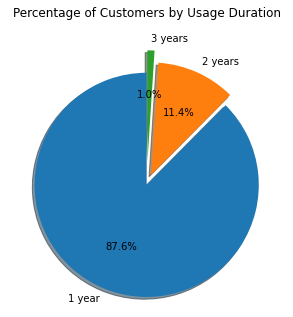

In [22]:
labels = ["1 year", "2 years", "3 years"]
sizes = [0, 0, 0]
explode = (0, 0.1, 0.2)
for c in data.customers.values():
    sizes[len(c.years) - 1] += 1

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

ax1.set_title("Percentage of Customers by Usage Duration\n")
fig1.set_facecolor('white')
plt.show()